In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

len(data['target'])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


569

(array([[569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [148., 297.,  88.,  28.,   5.,   3.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [567.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [569.,   0.,

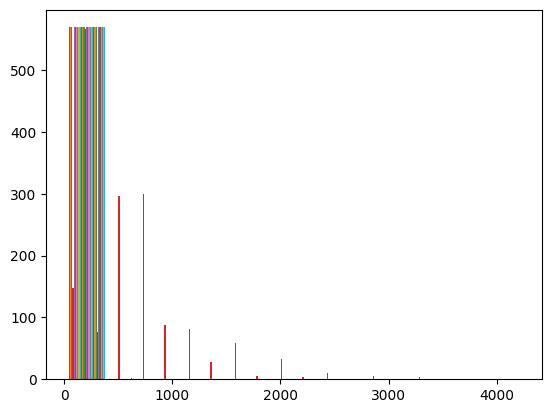

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['data'])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', color_codes=True)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE

from logitboost import LogitBoost

In [12]:
data = load_breast_cancer()
X = data.data
y = data.target_names[data.target]
n_classes = data.target.size

# Shuffle data and split it into training/testing samples
test_size = 1 / 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=True, stratify=y,
                                                    random_state=0)

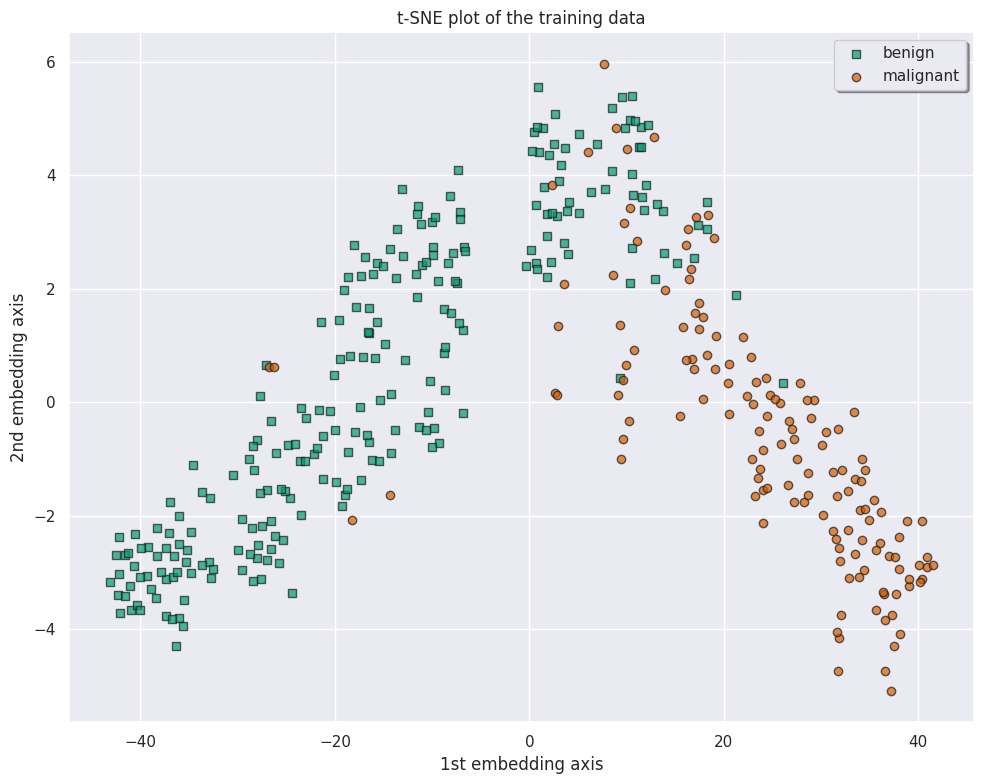

In [13]:
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 8))
mask_benign = (y_train == 'benign')
mask_malignant = (y_train == 'malignant')

plt.scatter(X_train_tsne[mask_benign, 0], X_train_tsne[mask_benign, 1],
           marker='s', c='g', label='benign', edgecolor='k', alpha=0.7)
plt.scatter(X_train_tsne[mask_malignant, 0], X_train_tsne[mask_malignant, 1],
           marker='o', c='r', label='malignant', edgecolor='k', alpha=0.7)


plt.title('t-SNE plot of the training data')
plt.xlabel('1st embedding axis')
plt.ylabel('2nd embedding axis')
plt.legend(loc='best', frameon=True, shadow=True)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
X_train_tsne 

In [14]:
lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

/home/kslote/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


LogitBoost(n_estimators=200, random_state=0)

In [15]:
y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

Training accuracy: 0.9947
Test accuracy:     0.9737


In [18]:
import pandas as pd
df = pd.read_csv("latent_class_breast_cancer.csv")
df.head()

,Unnamed: 0,model_number,classes_number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,CPROB1,CPROB2,Class,diagnosis
0,1,1,2,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,...,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0,1.040797e-46,1,M
1,2,1,2,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,...,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0,2.850273e-12,1,M
2,3,1,2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,...,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0,4.576229e-29,1,M
3,4,1,2,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,...,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0,2.257163e-24,1,M
4,5,1,2,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,...,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0,1.256152e-19,1,M


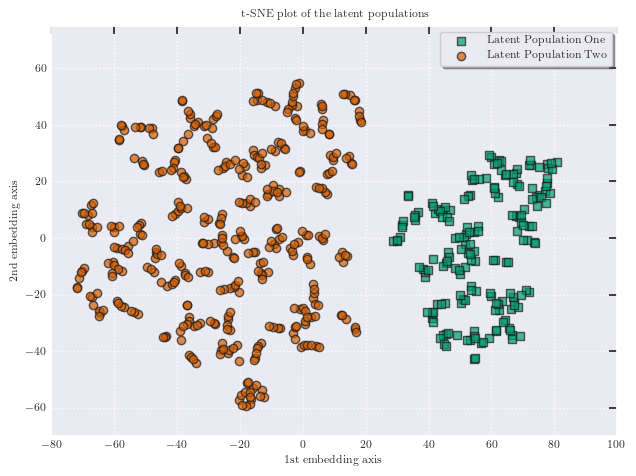

In [109]:
X = df.to_numpy()
X1 = X[:,list(range(3,35))]
y1 = X[:, 35]
y = X[:, 36]
tsne = TSNE(n_components=2, random_state=0, perplexity=4.0)
X_train_tsne = tsne.fit_transform(X1)

#plt.figure(figsize=(, 8))
mask_pop1 = (y1 == 1)
mask_pop2 = (y1 == 2)
mask_benign = (y1 == 1)
mask_malignant = (y1 == 2)

plt.scatter(X_train_tsne[mask_pop1, 0], X_train_tsne[mask_pop1, 1],
           marker='s', c='g', label='Latent Population One', edgecolor='k', alpha=0.7)
plt.scatter(X_train_tsne[mask_pop2, 0], X_train_tsne[mask_pop2, 1],
           marker='o', c='r', label='Latent Population Two', edgecolor='k', alpha=0.7)


plt.title('t-SNE plot of the latent populations')
plt.xlabel('1st embedding axis')
plt.ylabel('2nd embedding axis')
plt.legend(loc='best', frameon=True, shadow=True)
#plt.xlim([-35, 70])
#plt.ylim([-15, 20])
plt.xlim([-80, 100])
plt.ylim([-70, 75])

plt.tight_layout()
plt.show()
plt.close()

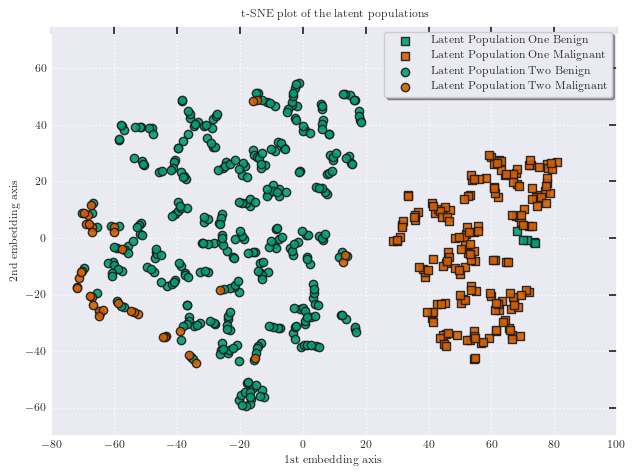

In [117]:
X = df.to_numpy()
X1 = X[:,list(range(3,35))]
y1 = X[:, 35]
y = X[:, 36]
tsne = TSNE(n_components=2, random_state=0, perplexity=4.0)
X_train_tsne = tsne.fit_transform(X1)

#plt.figure(figsize=(, 8))
mask_pop1 = (y1 == 1)
mask_pop2 = (y1 == 2)
mask_benign = (y == 'B')
mask_malignant = (y == 'M')

pop1_benign = np.logical_and(mask_benign, mask_pop1)
pop1_malignant = np.logical_and(mask_malignant, mask_pop1)
pop2_benign = np.logical_and(mask_benign, mask_pop2)
pop2_malignant = np.logical_and(mask_malignant, mask_pop2)

plt.scatter(X_train_tsne[pop1_benign, 0], X_train_tsne[pop1_benign, 1],
           marker='s', c='g', label='Latent Population One Benign', edgecolor='k', alpha=0.9)

plt.scatter(X_train_tsne[pop1_malignant, 0], X_train_tsne[pop1_malignant, 1],
           marker='s', c='r', label='Latent Population One Malignant', edgecolor='k', alpha=0.9)

# pop 2
plt.scatter(X_train_tsne[pop2_benign, 0], X_train_tsne[pop2_benign, 1],
           marker='o', c='g', label='Latent Population Two Benign', edgecolor='k', alpha=0.9)

plt.scatter(X_train_tsne[pop2_malignant, 0], X_train_tsne[pop2_malignant, 1],
           marker='o', c='r', label='Latent Population Two Malignant', edgecolor='k', alpha=0.9)

plt.title('t-SNE plot of the latent populations')
plt.xlabel('1st embedding axis')
plt.ylabel('2nd embedding axis')
plt.legend(loc='best', frameon=True, shadow=True)
#plt.xlim([-35, 70])
#plt.ylim([-15, 20])
plt.xlim([-80, 100])
plt.ylim([-70, 75])

plt.tight_layout()
plt.show()
plt.close()

In [113]:
c = np.logical_and(mask_benign, mask_pop1)
c

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

fig = plt.figure(figsize=(2, 2), facecolor='w')
ax = fig.add_axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)

for i in [-1, 0, 1]:
    ax.plot([i, i], [-1, 1], '-k')
    ax.plot([-1, 1], [i, i], '-k')

kwds = dict(ha='center', va='center', size=11)

ax.text(-0.5, 1.15, '1', **kwds)
ax.text(0.5, 1.15, '0', **kwds)
ax.text(0, 1.25, '$T_1$', **kwds)

ax.text(-1.15, 0.5, '1', **kwds)
ax.text(-1.15, -0.5, '0', **kwds)
ax.text(-1.25, 0, '$T_2$', **kwds)

kwds['size'] = 14

ax.text(0.5, 0.5, '$X_1$', **kwds)
ax.text(-0.5, 0.5, '$X_2$', **kwds)
ax.text(-0.5, -0.5, '$X_3$', **kwds)
ax.text(0.5, -0.5, '$X_4$', **kwds)

ax.set_xlim(-1.5, 1.2)
ax.set_ylim(-1.2, 1.5)

plt.show()

In [63]:
plt.show()

In [61]:
import sys
!{sys.executable} -m pip install astroml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.8 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
